# Exploratory Data Analysis

In [28]:
import ast
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df1 = pd.read_csv(r'C:\Users\lenovo\Documents\archive\Orders.csv')
df2 = pd.read_csv(r'C:\Users\lenovo\Documents\archive\Details.csv')

df = pd.merge(df1,df2,on='Order ID',how='inner')

df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce')
df

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,5729,64,14,Furniture,Chairs,EMI
1,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,671,114,9,Electronics,Phones,Credit Card
2,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,443,11,1,Clothing,Saree,COD
3,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,57,7,2,Clothing,Shirt,UPI
4,B-26055,2018-03-10,Harivansh,Uttar Pradesh,Mathura,227,48,5,Clothing,Stole,COD
...,...,...,...,...,...,...,...,...,...,...,...
1495,B-25742,2018-08-03,Ashwin,Goa,Goa,11,-8,2,Clothing,Skirt,UPI
1496,B-26088,2018-03-26,Bhavna,Sikkim,Gangtok,11,5,2,Clothing,Hankerchief,UPI
1497,B-25707,2018-07-01,Shivani,Maharashtra,Mumbai,8,-6,1,Clothing,Stole,COD
1498,B-25758,2018-08-22,Shubham,Himachal Pradesh,Simla,8,-2,1,Clothing,Stole,COD


In [29]:
df.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

In [109]:
df.duplicated().sum()

0

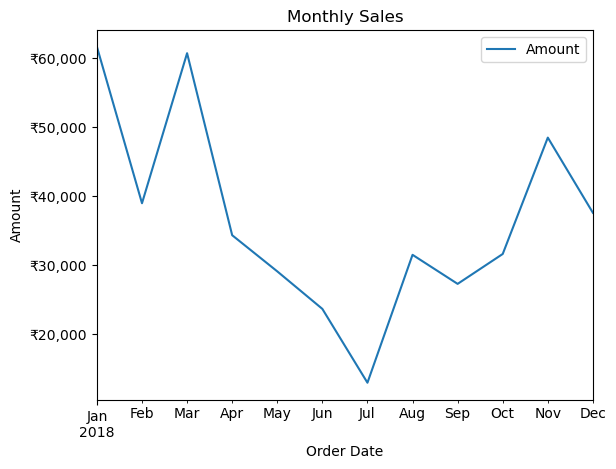

In [30]:
df.groupby(df['Order Date'].dt.to_period('M'))['Amount'].sum().plot(kind='line', title='Monthly Sales', legend=True)
plt.title('Monthly Sales')
plt.ylabel('Amount')
ax = plt.gca()
ax.yaxis.set_major_formatter('₹{x:,.0f}')

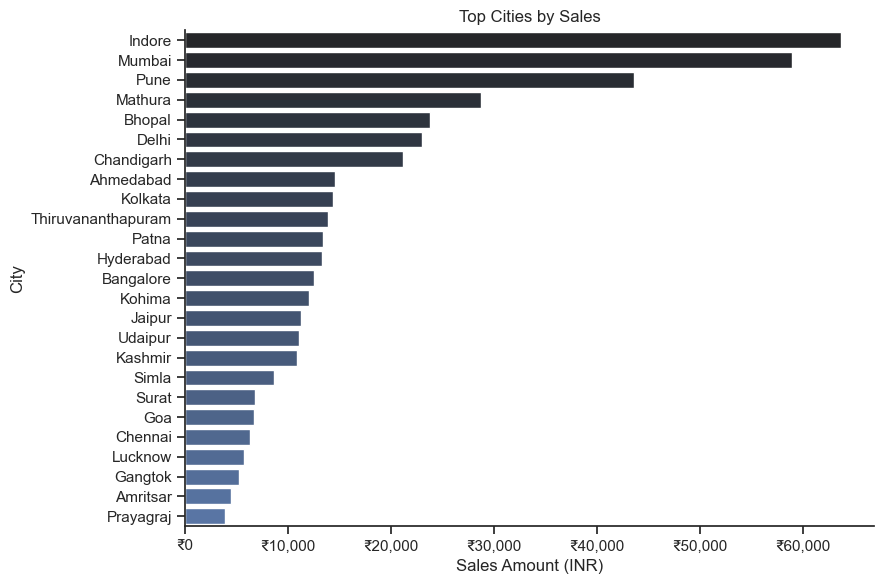

In [44]:
city_sales = df.groupby('City')['Amount'].sum().sort_values()

plt.figure(figsize=(9, 6))
sns.barplot(x=city_sales.values, y=city_sales.index, palette='dark:b_r',hue=city_sales.index)

sns.despine()
sns.set_theme(style='ticks')
plt.title('Top Cities by Sales')
plt.gca().invert_yaxis()

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{x:,.0f}'))
plt.xlabel('Sales Amount (INR)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

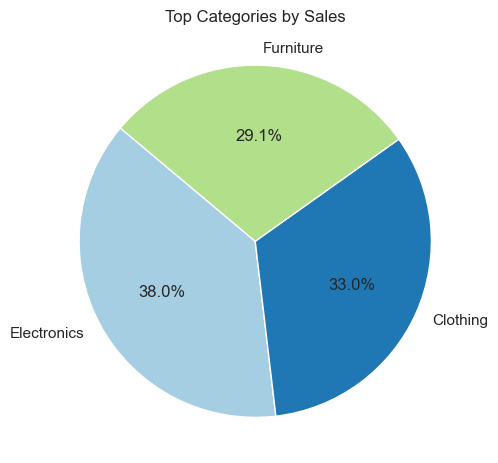

In [ ]:
df_category = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(5, 5.5))
plt.pie(df_category, 
        labels=df_category.index, 
        autopct='%1.1f%%',  
        startangle=140,
        colors=plt.cm.Paired.colors)

plt.title('Top Categories by Sales')
plt.ylabel('')  
plt.axis('equal')
plt.show()


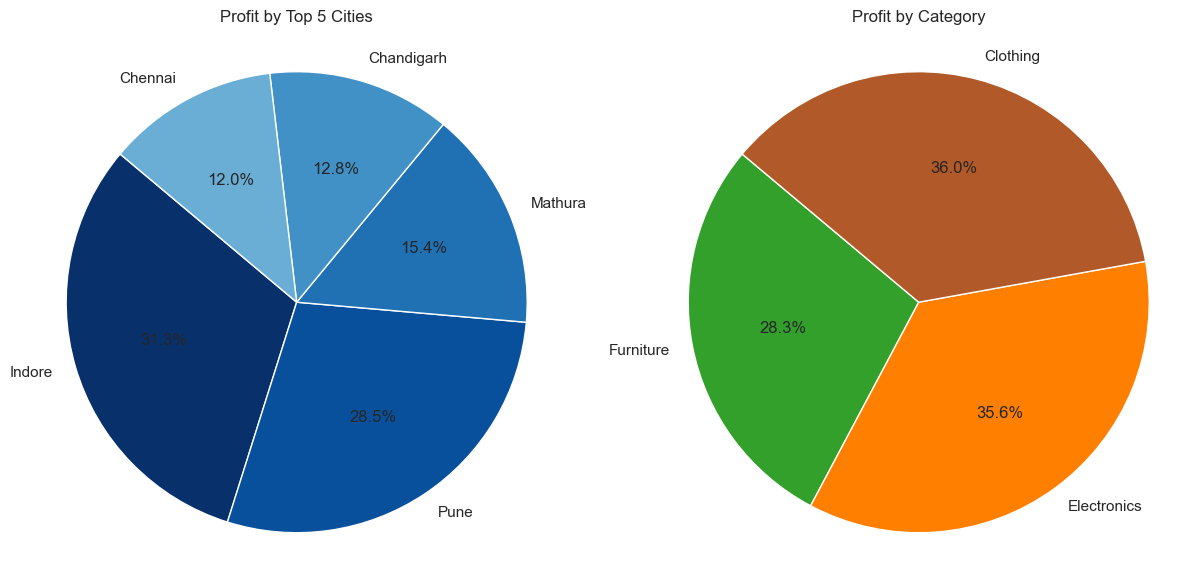

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

profit_by_city = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5)
axes[0].pie(profit_by_city, 
            labels=profit_by_city.index, 
            autopct='%1.1f%%', 
            startangle=140,
            colors=plt.cm.Blues(np.linspace(1, 0.5, len(profit_by_city))))
axes[0].set_title('Profit by Top 5 Cities')
axes[0].axis('equal')

profit_by_category = df.groupby('Category')['Profit'].sum().sort_values()
axes[1].pie(profit_by_category, 
            labels=profit_by_category.index, 
            autopct='%1.1f%%', 
            startangle=140,
            colors=plt.cm.Paired(np.linspace(0.3, 1, len(profit_by_category))))
axes[1].set_title('Profit by Category')
axes[1].axis('equal')

plt.tight_layout()
plt.show()
